In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
import matplotlib as mpl
import matplotlib.pyplot as plt
import os

In [2]:
human_data = pd.read_table('../Datasets/human_dataset.txt')
labels = human_data['class'].to_numpy()
dna_spectral_representation = np.load('../DNA Vector Representations/human_dataset_dna_vector.npy')
print(dna_spectral_representation.shape)
print(labels.shape)

(4380, 1024)
(4380,)


In [3]:
X_train_full, X_test, y_train_full, y_test = train_test_split(dna_spectral_representation, labels, test_size = 0.2)

# Model : LeNet5 like Architecture CNN for Text Classification

In [4]:
model = keras.Sequential()

model.add(keras.layers.Conv1D(filters=20, kernel_size=(5), activation='relu', input_shape=(1024,1),padding="same"))
model.add(keras.layers.MaxPooling1D())

model.add(keras.layers.Conv1D(filters=10, kernel_size=(5), activation='relu', input_shape=(512,1),padding="same"))
model.add(keras.layers.MaxPooling1D())

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(units=256, activation='relu'))

model.add(keras.layers.Dense(units=256, activation='relu'))

model.add(keras.layers.Dense(units=256, activation='relu'))

model.add(keras.layers.Dense(units=7, activation = 'softmax'))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 1024, 20)          120       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 512, 20)          0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 512, 10)           1010      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 256, 10)          0         
 1D)                                                             
                                                                 
 flatten (Flatten)           (None, 2560)              0         
                                                                 
 dense (Dense)               (None, 256)               6

In [6]:
# keras.backend.clear_session()
# model.reset_states()

In [7]:
opt = keras.optimizers.SGD(learning_rate=0.01,momentum = 0.1)
model.compile(loss="sparse_categorical_crossentropy",optimizer=opt,metrics=["accuracy"])

In [8]:
X_train , X_valid , y_train ,y_valid = train_test_split(dna_spectral_representation, labels, test_size = 0.1,random_state=10)

In [9]:
history = model.fit(X_train, y_train, epochs=15 ,validation_data=(X_valid, y_valid),batch_size = 16)

Epoch 1/15
247/247 [==============================] - 4s 14ms/step - loss: 1.6530 - accuracy: 0.3919 - val_loss: 1.4242 - val_accuracy: 0.4315
Epoch 2/15
247/247 [==============================] - 3s 13ms/step - loss: 1.2252 - accuracy: 0.5632 - val_loss: 1.1018 - val_accuracy: 0.6530
Epoch 3/15
247/247 [==============================] - 3s 13ms/step - loss: 0.9265 - accuracy: 0.6839 - val_loss: 0.8895 - val_accuracy: 0.7192
Epoch 4/15
247/247 [==============================] - 3s 13ms/step - loss: 0.6799 - accuracy: 0.7773 - val_loss: 0.7424 - val_accuracy: 0.7603
Epoch 5/15
247/247 [==============================] - 3s 13ms/step - loss: 0.4992 - accuracy: 0.8379 - val_loss: 0.6448 - val_accuracy: 0.7831
Epoch 6/15
247/247 [==============================] - 3s 13ms/step - loss: 0.3596 - accuracy: 0.8823 - val_loss: 0.6904 - val_accuracy: 0.7671
Epoch 7/15
247/247 [==============================] - 3s 13ms/step - loss: 0.2508 - accuracy: 0.9252 - val_loss: 0.8050 - val_accuracy: 0.7831

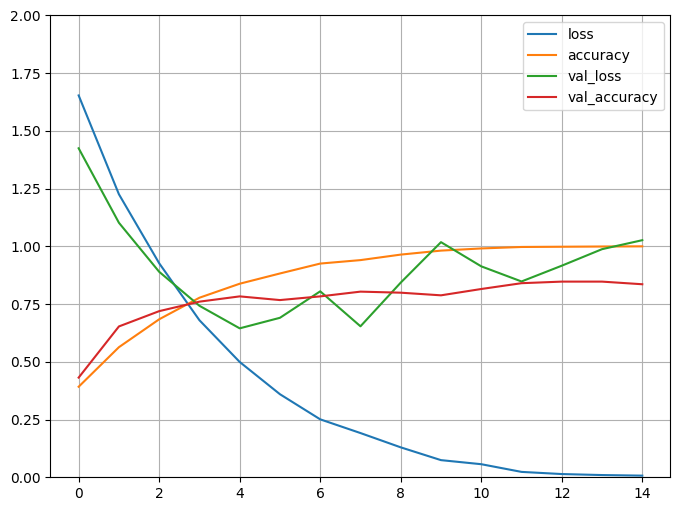

In [12]:
pd.DataFrame(history.history).plot(figsize=(8, 6))
plt.grid(True)
plt.gca().set_ylim(0, 2)
plt.show()

In [11]:
model.save("model")
print("Saved model to disk")

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


Saved model to disk
